<img src="https://raw.githubusercontent.com/UXARRAY/uxarray/main/docs/_static/images/logos/uxarray_logo_h_dark.svg"
     width="30%"
     alt="UXarray logo"
     align="right"
/>

# Unstructured Grids Overview

### In this section, you'll learn:

* What unstructured meshes are and how they are different than structured grids
* Grid terminology and conventions
* Unstructured grid formats 


### Related Documentation

* [UXarray Terminology Documentation](https://uxarray.readthedocs.io/en/latest/user-guide/terminology.html)
* [UXarray Conventions Documentation](https://uxarray.readthedocs.io/en/latest/user-guide/representation.html)
* [UXarray Supported Models and Grid Formats Documentation](https://uxarray.readthedocs.io/en/latest/user-guide/grid-formats.html)

### Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [CF Conventions](https://cfconventions.org/) | Necessary | |
| [UGRID Conventions](https://ugrid-conventions.github.io/ugrid-conventions/) | Helpful | |
| [Numpy](https://numpy.org/) | Helpful | |
| [Xarray](https://docs.xarray.dev/en/stable/) | Helpful | |

* **Time to learn**: 15 minutes
-----



## Structured vs Unstructured Grids

Before diving into unstructured grids, it is helpful to understand the basic differences between structured and unstructured grids:

* A structured grid is composed of grid cells (faces) that are well-organized in a predictable, grid-like topology, where simple indexing can be used to identify neighboring cells,
* An unstructured grid represents the globe as a tesselation of various polygons (e.g. triangles, hexagons, etc.) to represent complex geometries, allowing those elements to be joined in any manner, but requiring explicit information to identify neighboring elements such as cells and nodes (vertices).

Note that the focus here is on the horizontally unstructured grids in the climate and weather context, which may or may not involve vertical levels, but the same concepts apply to three dimensional unstructured grids as well.

Examples of structured grids (on left) and unstructured grids (center and right) can be seen below: 

<img title="Structured Lat-Lon Grid" alt="Alt text" src="../../_static/images/grids.png" width="1200">

### Structured Grids

A few advantages of structured grids are:
- Uniform Representation: Simplifies numerical methods and enhances result interpretation.
  
- Efficient Numerics: Well-suited for finite-difference schemes, ensuring computational efficiency.
  
- Simplified Interpolation: Straightforward interpolation facilitates integration of observational data and model outputs.
  
- Boundary Handling: Ideal for regular boundaries, easing implementation of boundary conditions.
  
- Optimized Parallel Computing: Regular structure supports efficient parallel computing for scalability.

#### Sample Xarray Code to Generate a Basic Structured Grid

The code below shows the creation of a structured grid example over 2D Earth geometry and plots random temperature data over it. There are several ways and tools to create a structured grid, but this code works as follows:

Given the number of points in longitude and latitude directions, the code uses Numpy's meshgrid to generate a structured grid. The temperature data is then interpolated onto this grid, creating a smooth representation. Xarray is leveraged to organize the gridded data into a dataset, facilitating easy manipulation and visualization. The resulting plot showcases the data on this structured grid, providing a clearer understanding of temperature variations across defined longitude and latitude ranges. Plotting the structured grid and the temperature data is done using Matplotlib along with Cartopy, a cartographic plotting library. 

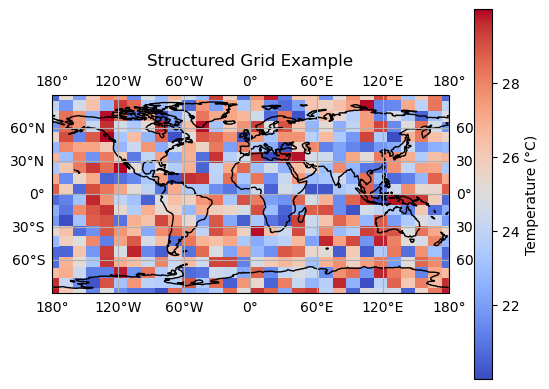

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Define the global domain
lat_range = [-90.0, 90.0]
lon_range = [-180.0, 180.0]

# Create a structured grid. Note the number of points in each dimension
# There is not need to store the grid points in a separate array
# Also note that the grid points are evenly spaced and not connectivity information is needed

num_lat_points = 20
num_lon_points = 30

lats = np.linspace(lat_range[0], lat_range[1], num_lat_points)
lons = np.linspace(lon_range[0], lon_range[1], num_lon_points)

lons_grid, lats_grid = np.meshgrid(lons, lats)

# Generate random temperature data for each grid point
temperature_data = np.random.uniform(
    low=20, high=30, size=(num_lat_points, num_lon_points)
)

# Create xarray Dataset
ds = xr.Dataset()
ds["temperature"] = (["lat", "lon"], temperature_data)
ds["lon"] = lons
ds["lat"] = lats

# Plot the structured grid using xarray
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_global()

# Plot world map lines
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Plot the structured grid
cs = ax.pcolormesh(
    ds["lon"], ds["lat"], ds["temperature"], cmap="coolwarm", shading="auto"
)

# Colorbar
cbar = plt.colorbar(cs, ax=ax, label="Temperature (°C)")

ax.set_title("Structured Grid Example")
plt.show()

### Unstructured Grids

Characteristic features of unstructured grids are:


- Adaptability to complex geometries: Fits intricate shapes and boundaries

- Often runs faster than structured grids: Requires fewer elements to achieve similar accuracy
  
- Local refinement: Concentrates resolution on areas of interest
  
- Flexibility in element types: Accommodates various element shapes
  
- Efficient parallelization: Scales well to multiple processors
  
- Suitability for dynamic simulations: Adapts to changing conditions

#### Sample Xarray Code to Generate a Basic Unstructured Mesh

The code below uses a very basic, standard Python approach to showcase a simple unstructured mesh topology (without a real meaning or value). 

This code generates an unstructured grid out of 600 arbitrarily created nodes (latitude, longitude pairs sampled from corresponding ranges via a uniform distribution). It performs Delaunay triangulation of those nodes using matplotlib.tri.Triangulation to create grid cells. The resulting triangulation is then plotted using cartopy and matplotlib.

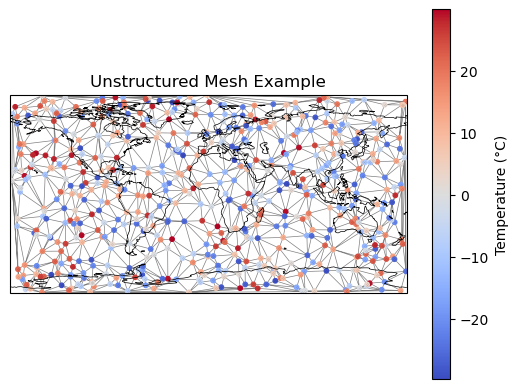

In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np
import xarray as xr

# Generate random temperature data
np.random.seed(42)
num_points = 600
latitudes = np.random.uniform(low=-90, high=90, size=num_points)
longitudes = np.random.uniform(low=-180, high=180, size=num_points)
temperatures = np.random.uniform(low=-30, high=30, size=num_points)

# Create xarray DataArray for temperature data
temperature_data = xr.DataArray(
    temperatures, dims="points", coords={"points": range(num_points)}
)

# Perform Delaunay triangulation
triang = mtri.Triangulation(longitudes, latitudes)

# Create xarray DataArray for triangulation coordinates
triang_data = xr.DataArray(
    np.column_stack([triang.x, triang.y]), dims=("points", "coords")
)

# Plot the globe with unstructured mesh using xarray
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_global()

# Plot world map lines with prominent gridlines
ax.coastlines(linewidth=0.5)
# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5)

# Plot unstructured mesh with bold lines
ax.triplot(
    triang, "ko-", markersize=0.1, linewidth=0.5, alpha=0.5
)  # Increase linewidth to see the triangles

# Scatter plot with temperature data
sc = ax.scatter(
    longitudes,
    latitudes,
    c=temperature_data,
    cmap="coolwarm",
    s=10,
    transform=ccrs.PlateCarree(),
)

# Colorbar
cbar = plt.colorbar(sc, ax=ax, label="Temperature (°C)")

ax.set_title("Unstructured Mesh Example")
plt.show()

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note:</p>
    This is a very basic example to show how an unstructured grid with triangles would look like. In actual model outputs, often the region of interest is meshed with a finer resolution, while it is coarsened in areas where high resolution is not needed. This is done to reduce the number of elements and improve computational efficiency.
</div>

## Why Unstructured Grids?

#### Arrival of the next generation, kilometer-scale global models for weather and climate
The aforementioned features and strengths of unstructured grids make them appealing for data analysis and visualization of kilometer-scale global weather and climate model outputs that produce very large spatio-temporal datasets. 

Therefore, after nearly two decades of development and evaluation, the climate and global weather modeling communities are transitioning from simple structured grids to this kind of more complex, but more scalable unstructured grids upon which governing equations of state are solved. 

## Many Unstructured Grid Types, No Commonly Used Convention or Tools

There are several climate and weather models that generate unstructured grids that vary from each other regarding not only the geometric elements (shape of grid faces, i.e. polygons, etc.) but also the file formats and extensions, and how special information such as geometric elements' connectivity is represented. This creates a challenge towards having a widely used convention for the representation of unstructured grid data.

There are only a few analysis tools that are capable of working directly with unstructured mesh data that come from so many mesh formats, and most of the time, the common practice is to resample to structured grids, but this has myriad pitfalls. 

## Why UXarray for Unstructured Grids?

UXarray, which stands for "Unstructured Grids - Xarray", is a Python package that provides Xarray-styled analysis and visualization functionality for working **directly** with unstructured grids that are resulting from most of the climate and weather models. Offering a unified representation of various model outputs around the UGRID conventions, UXarray enables working with native unstructured grids in a single, grid format-agnostic interface.

More on UXarray in the next chapter.

## What is next?
The next section will provide an overview of the general-purpose plotting libraries available in the scientific Python ecosystem.